# Network science

## Structure of interactions and different models of ecological network

Contributers: Nguyen Xuan Tung/ Farin Binta Zahir

## Analysis the network

In [23]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import collections
import itertools
import numpy as np
import community
import time
from numpy.linalg import eig
import seaborn as sns
import scipy.linalg as la
import matplotlib.ticker as ticker

In [5]:
attr = pd.read_csv('FW_005-species.csv')
attr

,Specie,Kingdom,Role,Degree,Sum(connections strength),Networks presence
0,Adult hake,Animals,Predator,22,1.0020,1
1,Adult hake,Animals,Prey,4,0.6520,1
2,Anchovy,Animals,Predator,1,1.0000,1
3,Anchovy,Animals,Prey,14,1.5000,1
4,Anglerfishes,Animals,Predator,9,1.0010,1
...,...,...,...,...,...,...
74,Suprabenthos,Animals,Prey,24,3.3081,1
75,Suprabenthos,Animals,Predator,3,1.0000,1
76,Discard,Plants,Prey,4,0.6350,1
77,Phytoplankton,Plants,Prey,10,1.9630,14


In [6]:
name = attr['Specie'].tolist()
group = attr['Role'].tolist()
G = nx.read_edgelist('FW_005.txt', create_using=nx.DiGraph())

dict_color = {}
cnt = 0
for i in set(group):
    dict_color[i] = cnt
    cnt = cnt + 1
    
node_colors = []
for v in G.nodes():
    G.nodes[v]['Specie'] = name[int(v)]
    G.nodes[v]['Role'] = group[int(v)]
    node_colors.append(dict_color[group[int(v)]])

In [7]:
#nx.write_gml(G, 'gephi.gml')
label = {}
node_color = []
for nodes in G.nodes():
    label[nodes] = G.nodes[nodes]['Specie']

<function matplotlib.pyplot.show(close=None, block=None)>

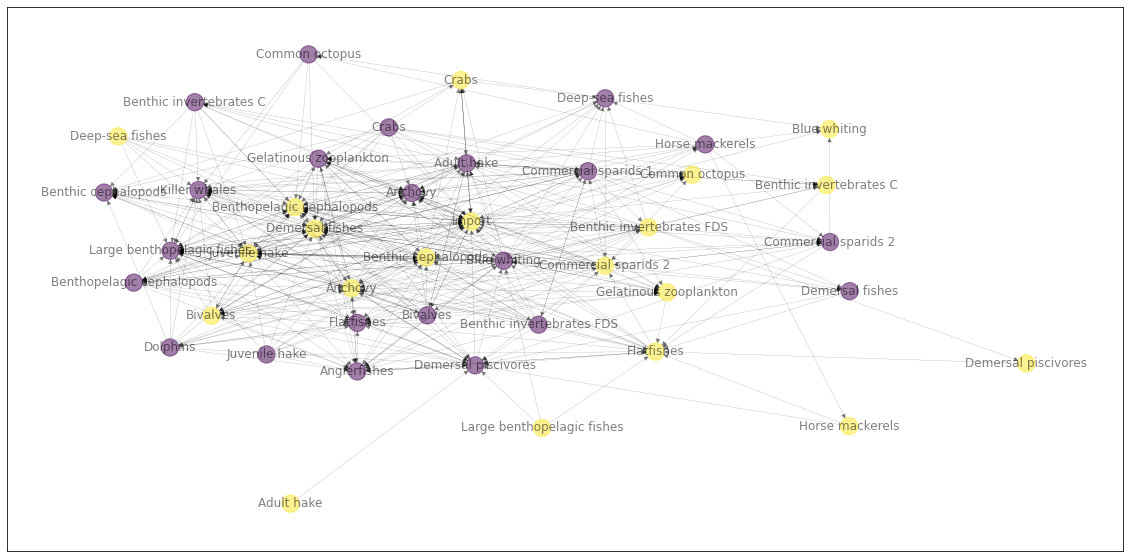

In [5]:
plt.figure(figsize=[20,10])
nx.draw_networkx(G, pos=nx.kamada_kawai_layout(G), node_color = node_colors, 
                 width=0.2, alpha=0.5, labels=label, with_labels=True)
plt.show

In [6]:
print('Order of the network is: ' + str(len(G.nodes())))
print('Size of the network is: ' + str(len(G.edges())))

Order of the network is: 43
Size of the network is: 409


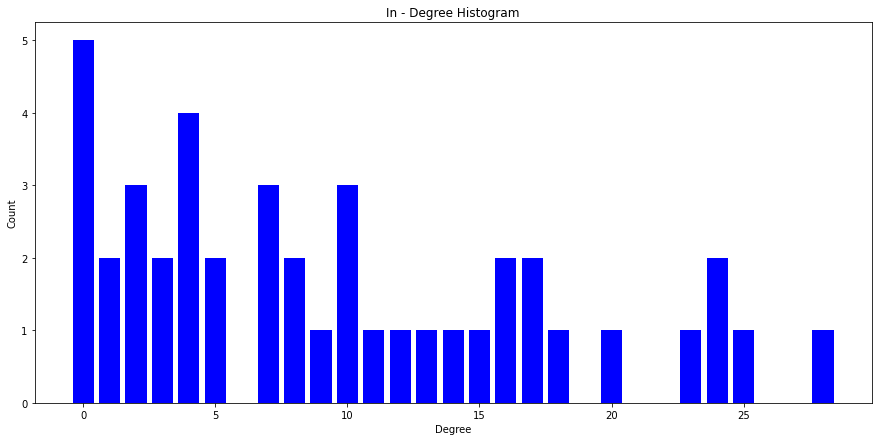

In [7]:
degree_sequence = sorted([d for n, d in G.in_degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=[15,7])
plt.bar(deg, cnt, width=0.8, color='b')

plt.title("In - Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
#ax.set_xticks([d for d in deg])
#ax.set_xticklabels(deg)
plt.show()

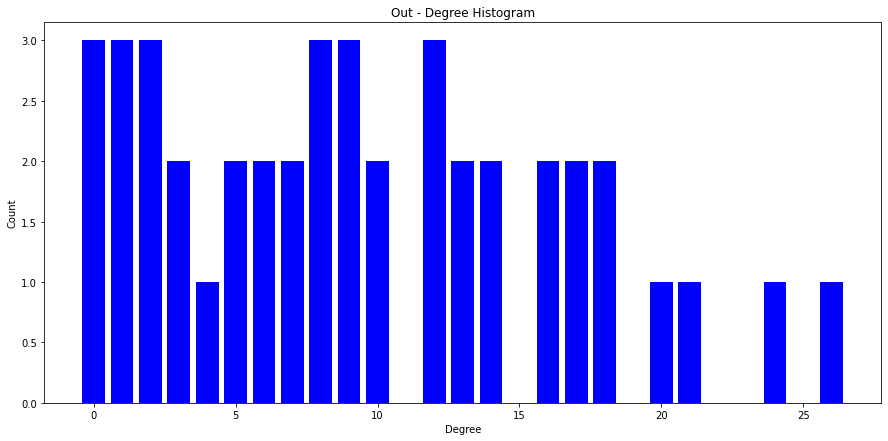

In [8]:
degree_sequence = sorted([d for n, d in G.out_degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=[15,7])
plt.bar(deg, cnt, width=0.8, color='b')

plt.title("Out - Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
#ax.set_xticks([d for d in deg])
#ax.set_xticklabels(deg)
plt.show()

The out-degree and in-degree of each species represent correspondingly the vulnerability (number of predators) and generality (number of resources). Both the distributions follow the power law.

----------------------------------------------------------------------------------------------------------

Structures formed by groups of multiple nodes can beanalyzed by looking at what types of relationships the nodes (representing a species) are typically embeddeding (e.g.competition,intraguild predation - intraguild predation is the killing and sometimes eating of potential competitors. This interaction represents a combination of predation and competition, because both species relyon the same prey resources and also benefit from preyingupon one another), by determining if there are nodes found in dense clusters or non-overlapping compartments,forming modular communities or using motif distribution.

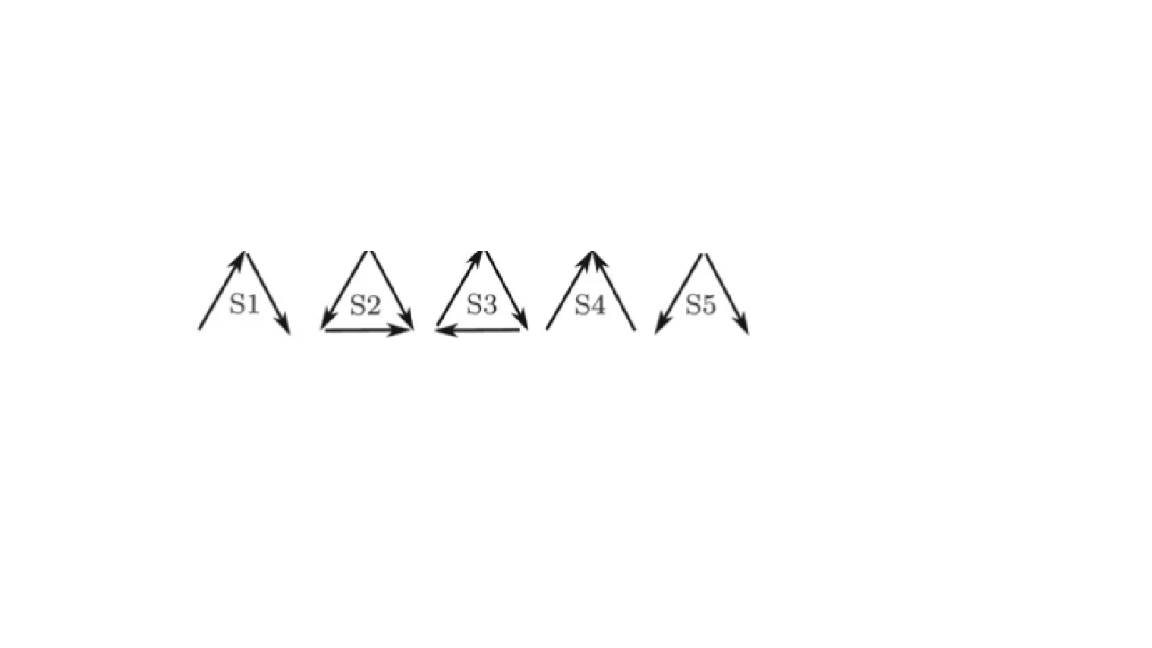

In [61]:
from IPython.display import Image
Image(filename='3-node-motif.png')

In [8]:
motifs = {
    'S1': nx.DiGraph([(1,2),(2,3)]),
    'S2': nx.DiGraph([(1,2),(1,3),(2,3)]),
    'S3': nx.DiGraph([(1,2),(2,3),(3,1)]),
    'S4': nx.DiGraph([(1,2),(3,2)]),
    'S5': nx.DiGraph([(1,2),(1,3)])
    }

In [9]:
def mcounter(gr, mo):
    """Counts motifs in a directed graph
    :param gr: A ``DiGraph`` object
    :param mo: A ``dict`` of motifs to count
    :returns: A ``dict`` with the number of each motifs, with the same keys as ``mo``
    This function is actually rather simple. It will extract all 3-grams from
    the original graph, and look for isomorphisms in the motifs contained
    in a dictionary. The returned object is a ``dict`` with the number of
    times each motif was found.::
        >>> print mcounter(gr, mo)
        {'S1': 4, 'S3': 0, 'S2': 1, 'S5': 0, 'S4': 3}
    """
    #This function will take each possible subgraphs of gr of size 3, then
    #compare them to the mo dict using .subgraph() and is_isomorphic
    
    #This line simply creates a dictionary with 0 for all values, and the
    #motif names as keys

    mcount = dict(zip(mo.keys(), list(map(int, np.zeros(len(mo))))))
    nodes = gr.nodes()

    #The for each each of the triplets, we (i) take its subgraph, and compare
    #it to all fo the possible motifs
    for trip in itertools.combinations(nodes(),3):
        subg = gr.subgraph(trip)
        for keys in mo.keys():
            if nx.is_isomorphic(subg, mo[keys]):
                mcount[keys] += 1
        
    return mcount

In [10]:
mcounter(G, motifs)

{'S1': 239, 'S2': 113, 'S3': 9, 'S4': 289, 'S5': 202}

In [28]:
ans = {'S1': 239, 'S2': 113, 'S3': 9, 'S4': 289, 'S5': 202}

Text(0.5, 0, 'motif type')

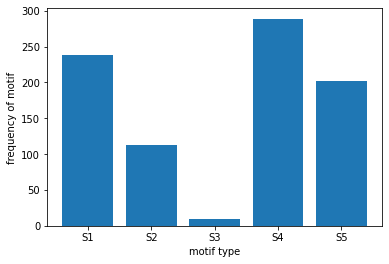

In [29]:
plt.bar(ans.keys(),ans.values())
plt.ylabel('frequency of motif')
plt.xlabel('motif type')

#### Degree Centrality

The degree centrality values are normalized by dividing by the maximum possible degree in a simple graph n-1 where n is the number of nodes in G.

For multigraphs or graphs with self loops the maximum degree might be higher than n-1 and values of degree centrality greater than 1 are possible.

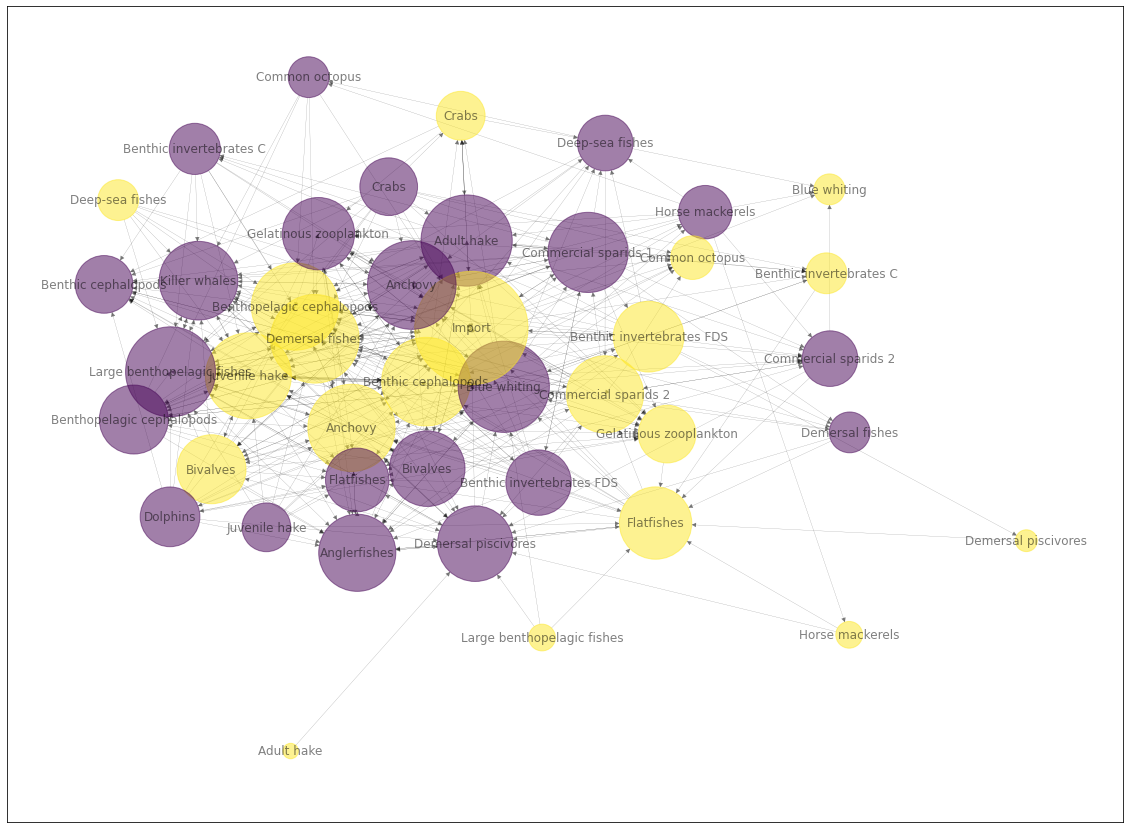

In [30]:
plt.figure(figsize=[20,15])
d = dict(nx.degree_centrality(G))

nx.draw_networkx(G, node_size=[v * 10000 for v in d.values()], pos=nx.kamada_kawai_layout(G),
                 node_color=node_colors, labels=label, alpha=0.5, width=0.2)

#### Betweenness Centrality

Degree centrality assigns an importance score based simply on the number of links held by each node.

It tells us: How many direct, ‘one hop’ connections each node has to other nodes in the network.

For finding very connected individuals, popular individuals, individuals who are likely to hold most information or individuals who can quickly connect with the wider network

 Degree centrality is the simplest measure of node connectivity. Sometimes it’s useful to look at in-degree (number of inbound links) and out-degree (number of outbound links) as distinct measures, for example when looking at transactional data or account activity.

In [9]:
clust_coeff = nx.clustering(G)
avg_clust = nx.average_clustering(G)

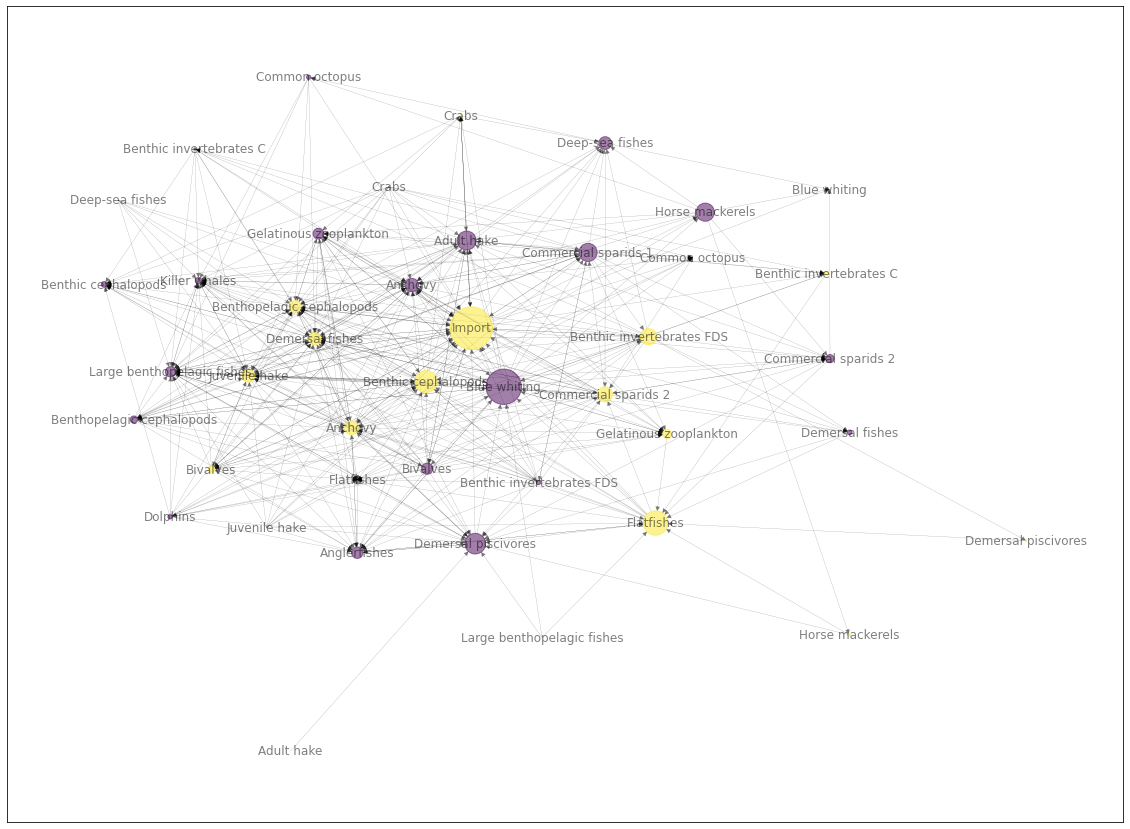

In [68]:
plt.figure(figsize=[20,15])
d = dict(nx.betweenness_centrality(G))

nx.draw_networkx(G, node_size=[v * 10000 for v in d.values()], pos=nx.kamada_kawai_layout(G),
                 node_color=node_colors, labels=label, alpha=0.5, width=0.2)

#### Eigenvector Cetrality

A natural extension of degree centrality is eigenvector centrality. In-degree centrality awards one centrality point for every link a node receives. But not all vertices are equivalent: some are more relevant than others, and, reasonably, endorsements from important nodes count more. The eigenvector centrality thesis reads:

A node is important if it is linked to by other important nodes.

Eigenvector centrality differs from in-degree centrality: a node receiving many links does not necessarily have a high eigenvector centrality (it might be that all linkers have low or null eigenvector centrality). Moreover, a node with high eigenvector centrality is not necessarily highly linked (the node might have few but important linkers).

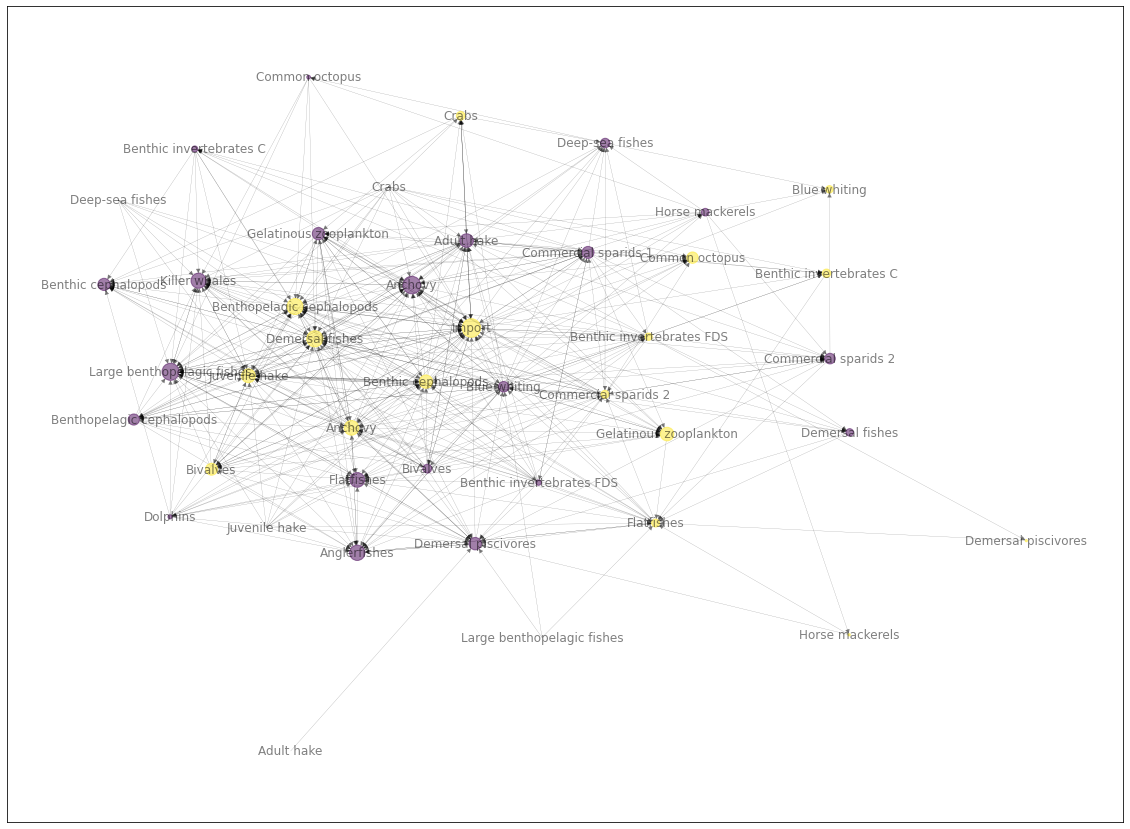

In [69]:
plt.figure(figsize=[20,15])
d = dict(nx.eigenvector_centrality(G))

nx.draw_networkx(G, node_size=[v * 1000 for v in d.values()], pos=nx.kamada_kawai_layout(G), 
                 alpha=0.5,node_color=node_colors,labels=label, width = 0.2)
plt.show()

### Closeness Centrality

Closeness centrality indicates how close a node is to all other nodes in the network. It is calculated as the average of the shortest path length from the node to every other node in the network. 

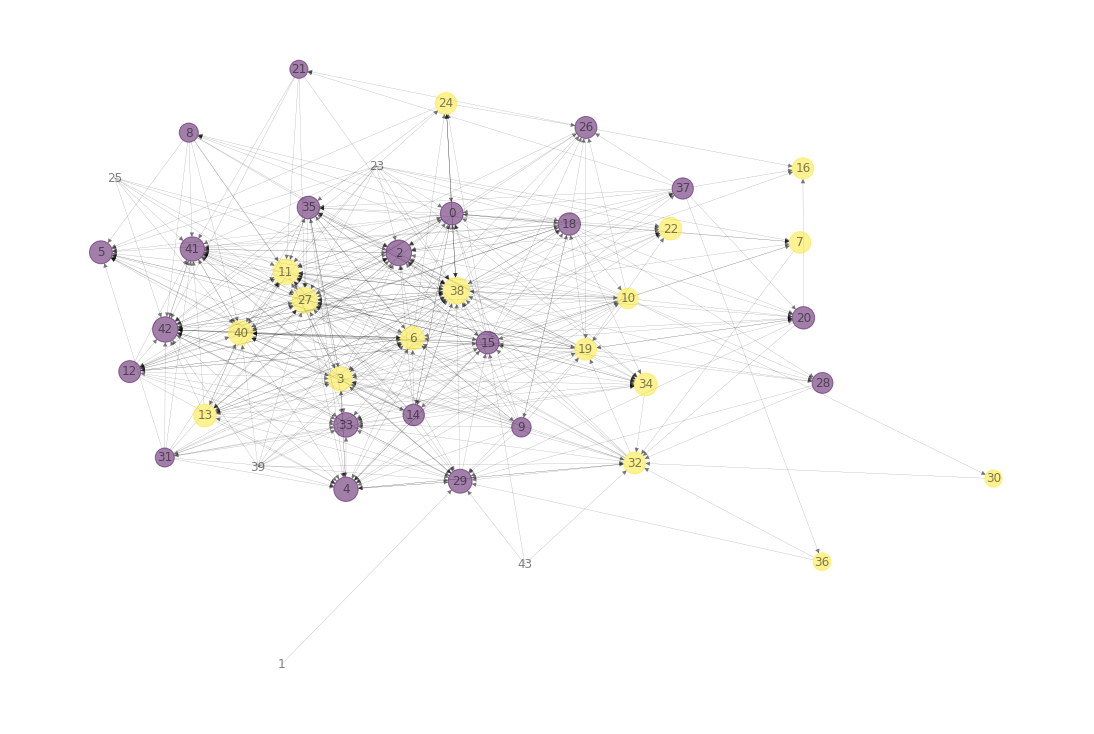

In [70]:
plt.figure(figsize=[15,10])
d = dict(nx.closeness_centrality(G))

nx.draw(G, node_size=[v * 1000 for v in d.values()], pos=nx.kamada_kawai_layout(G), alpha=0.5,node_color=node_colors,with_labels=True, width = 0.2)
plt.show()

### Community Detection and Analysis

Structures formed by groups of multiple nodes can beanalyzed by looking at what types of relationships the nodes (representing a species) are typically embeddedin (e.g.competition,intraguild predation - intraguildpredation is the killing and sometimes eating of potentialcompetitors. This interaction represents a combinationof predation and competition, because both species relyon the same prey resources and also benefit from preyingupon one another), by determining if there are nodes found in dense clusters or non-overlapping compartments,forming modular communities or using motif distribution.

In [71]:
hubs, authorities = nx.hits(G)

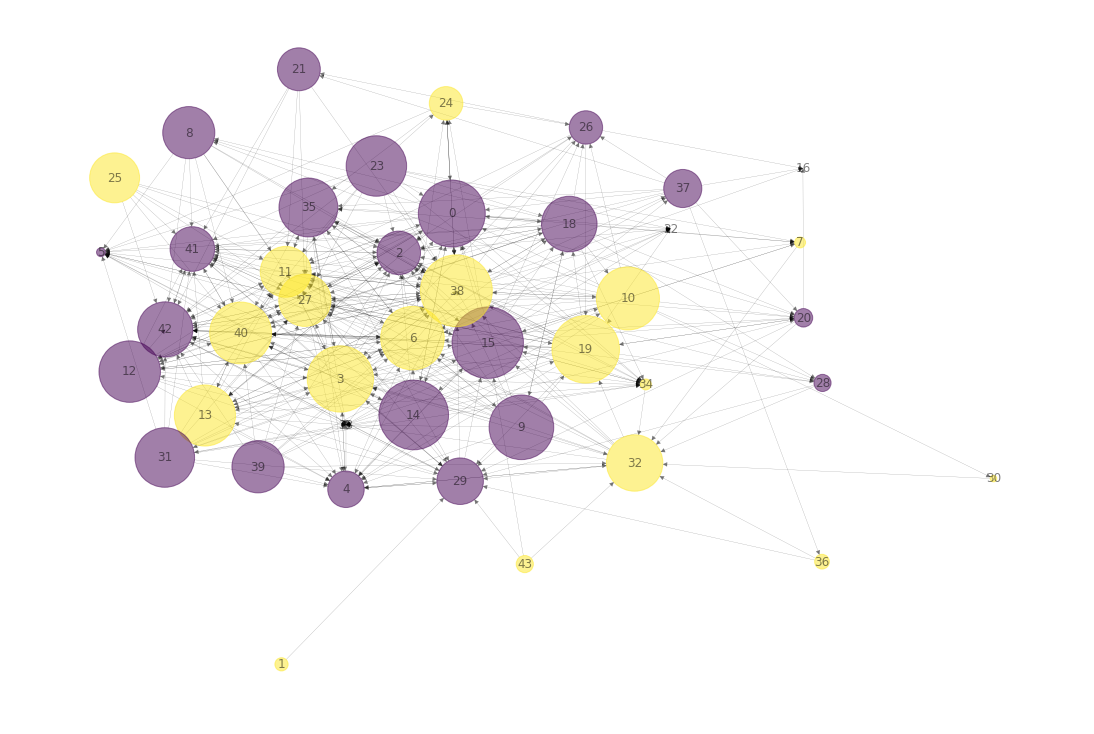

In [72]:
node_size=[100000*hubs[node] for node in hubs]
plt.figure(figsize=(15, 10))
nx.draw(G, nx.kamada_kawai_layout(G), alpha=0.5, with_labels=True, node_color=node_colors, node_size=node_size, width=0.2)
plt.show()

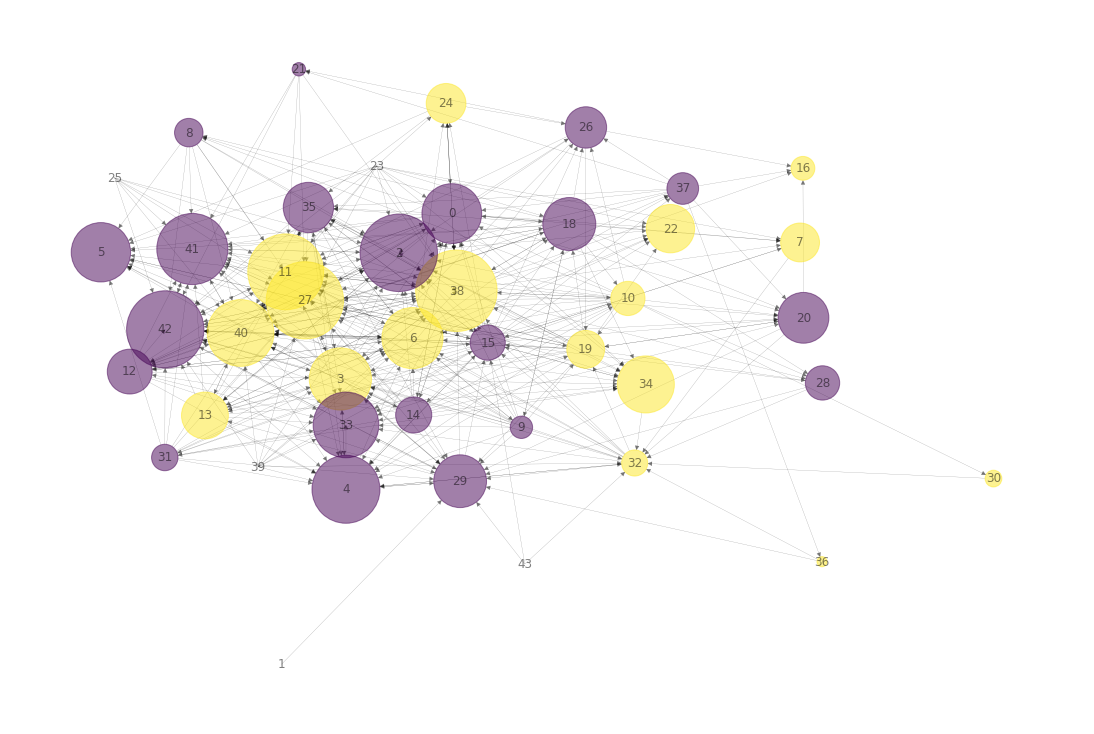

In [73]:
node_size=[100000*authorities[node] for node in authorities]
plt.figure(figsize=(15, 10))
nx.draw(G, nx.kamada_kawai_layout(G), alpha=0.5, with_labels=True, node_color=node_colors, node_size=node_size, width=0.2)
plt.show()

In [74]:
G1 = G.to_undirected()
partition = community.best_partition(G1)

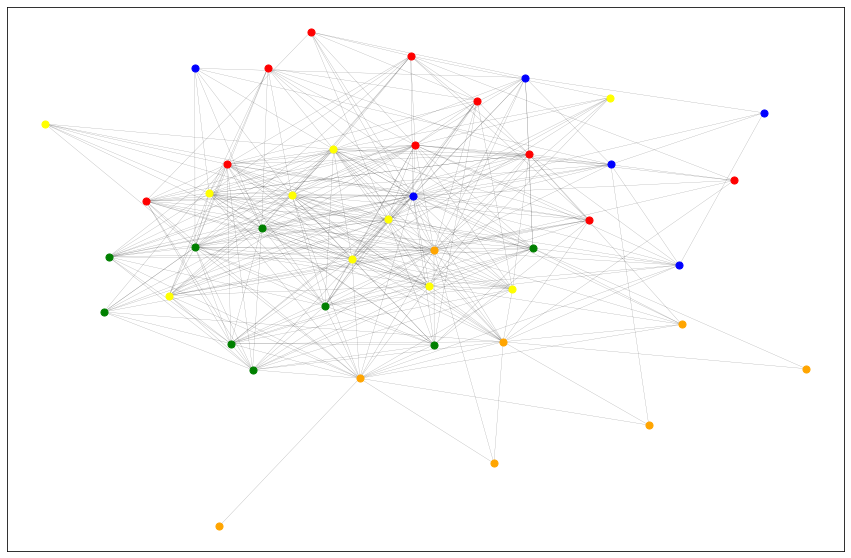

In [75]:
#drawing
size = float(len(set(partition.values())))
pos = nx.kamada_kawai_layout(G1)
count = 0
node_color = ['red','blue','green','yellow','orange']
plt.figure(figsize=(15,10))

for com in set(partition.values()) :
    count = count + 1
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G1, pos, list_nodes, node_size = 50, node_color = node_color[count-1], label=name)

nx.draw_networkx_edges(G1, pos, alpha=0.5, width=0.2)
plt.show()

In [76]:
list_nodes = []
names = []
groups = []
for com in set(partition.values()):
    temp = [nodes for nodes in partition.keys() if partition[nodes] == com]
    list_nodes.append(temp)
    names.append([name[int(nodes)] for nodes in temp])
    groups.append([group[int(nodes)] for nodes in temp])

In [77]:
for element in list_nodes[0]:
    print(list(G.predecessors(element)))

['0', '3', '6', '9', '10', '11', '14', '15', '18', '23', '24', '27', '37', '38']
['0', '2', '6', '9', '15', '18', '19', '23', '38', '40']
[]
['0', '6', '15', '23', '38']
['0', '10', '18']
['0', '3', '6', '11', '15', '18', '19', '24', '37', '38']
['0', '3', '6', '8', '12', '13', '14', '15', '18', '19', '23', '25', '32', '35', '38', '39', '41']
['0', '3', '6', '8', '9', '14', '15', '18', '23', '24', '31', '38', '40']
['0', '15', '18', '23', '38']
['0', '2', '3', '11', '13', '14', '15', '18', '23', '31', '38', '40']


In [78]:
label = {}
node_color = []
for nodes in G1.nodes():
    label[nodes] = G1.nodes[nodes]['Specie']
    node_color.append(partition[nodes])

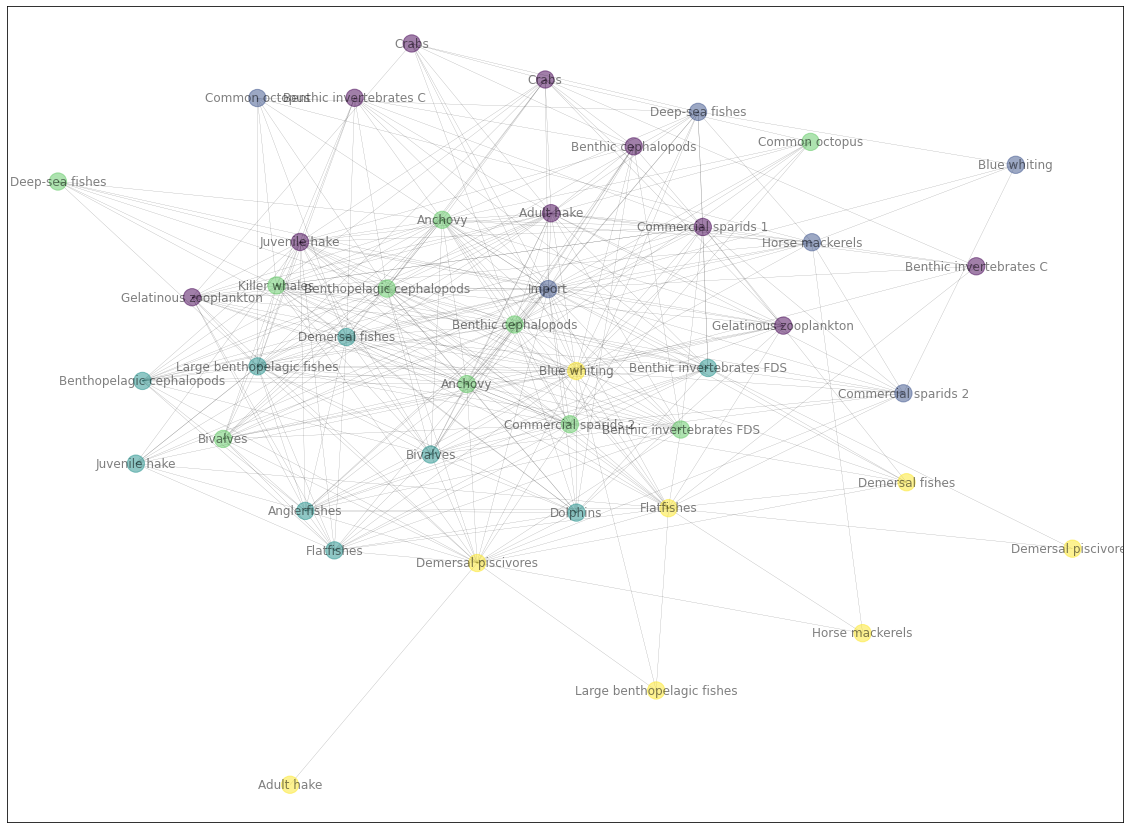

In [79]:
plt.figure(figsize=(20,15))
nx.draw_networkx(G1, pos = nx.kamada_kawai_layout(G1), node_color=node_color, labels=label, alpha=0.5,width=0.2)

----------------------------------------------------------------------------------------------------------------

In [85]:
data_df = pd.read_csv("FW_005.csv",header=None)
data_df = (data_df>0).astype(int)

In [86]:
# species number (S) and number of links (L)
S_ = G.number_of_nodes()
L_ = G.number_of_edges()

# in- and out-degrees
in_degrees = G.in_degree()
out_degrees = G.out_degree()

# create df to store in and out degrees
inout_df = pd.DataFrame.from_dict(dict(in_degrees), orient='index', columns=["in_degree"])
inout_df = pd.concat([inout_df, pd.DataFrame.from_dict(dict(out_degrees), orient='index', columns=["out_degree"])], axis=1)

# generality and vulnerability
inout_df['generality'] = inout_df['in_degree']/(L_*S_)
inout_df['vulnerability'] = inout_df['out_degree']/(L_*S_)

inout_df


,in_degree,out_degree,generality,vulnerability
0,14,21,0.000796,0.001194
3,16,16,0.000910,0.000910
6,15,18,0.000853,0.001023
9,2,16,0.000114,0.000910
10,4,17,0.000227,0.000967
11,23,9,0.001308,0.000512
14,4,20,0.000227,0.001137
15,11,24,0.000625,0.001365
18,10,17,0.000569,0.000967
23,0,14,0.000000,0.000796


### Trophic level

The trophic level is an estimator of the position of a specie in the food chain, which depends recursively on the trophic levels of the preys of that specie. All the basal species (which have "in_degree"=0 and at least one outgoing link) are assigned a trophic level $S(B)=1$. All the other species are assigned a trophic level according to the relation

$$ S(i) = 1 + \frac{1}{k_i^{(in)}} \sum_j a_{ji}\, S(j). $$
However, most of the times in a graph it is not possible to assign this value to all the nodes using the deterministic formula, because the requirement of having computed $S(j)$ for all incoming links is difficult to satisfy in general. At some point in the computation, all the nodes has at lest one undefined $S(j)$. So, an iterative procedure needs to be employed. We solved the problem by randomly initializing the values of the yet undefined $S(i)$ according to a given distribution and then repeating multiple times the computation using the definition of $S(i)$, until convergence is reached. The following plots show that the final result is independent on the initialization (also large initializations have been considered) and the convergence is reached in approximately 20 iterations.

In [88]:
def trophic_level(G_, loc_shift=10.0, sigma_shift=1.0, eps_it=1.0e-6, max_it=100):
    """
    Function that takes as input a graph (G_) and the desired random initialization for recursion procedure
    and outputs the estimated trophic levels and the time evolution of the trophic levels updates.
    """

    # useful graph parameters
    inout_df = pd.DataFrame.from_dict(dict(G_.in_degree()), orient='index', columns=["in_degree"])
    inout_df = pd.concat([inout_df, pd.DataFrame.from_dict(dict(G_.out_degree()), orient='index', columns=["out_degree"])], axis=1)
    S_ = G_.number_of_nodes()
    L_ = G_.number_of_edges()

    # initialize trophic level df
    trophiclevel_df = pd.Series([np.nan]*S_, index=list(G_.nodes()))

    # set trophic level of basal species
    leaves_idx = inout_df[(inout_df['in_degree']==0) & (inout_df['out_degree']>0)].index
    trophiclevel_df[leaves_idx] = 1

    # set trophic level of unconnected species to -inf
    trophiclevel_df[inout_df[(inout_df['in_degree']==0) & (inout_df['out_degree']==0)].index] = - np.inf


    # ---------------------------------------------------
    # deterministic computation of known trophic levels
    # ---------------------------------------------------
    N_undef_old, N_undef_new = S_, S_-1

    # deterministic iterations
    while((N_undef_new < N_undef_old) and (N_undef_new > 0)):
        # get indexes of species undefined yet
        undef_idx = trophiclevel_df[np.isnan(trophiclevel_df)].index
        N_undef_old = len(undef_idx)

        for idx in undef_idx:
            # check if there is any predecessor with undefined trophic level
            any_undef = np.any(np.isnan(trophiclevel_df[G_.predecessors(idx)]))
                    
            # if all predecessor nodes have defined trophic level, update the trophic level
            if any_undef==False:
                trophiclevel_df[idx] = 1 + (1.0/inout_df.loc[idx,'in_degree'])*np.sum(trophiclevel_df[G_.predecessors(idx)])
        
        N_undef_new = len(trophiclevel_df[np.isnan(trophiclevel_df)])



    # ---------------------------------------------------
    # iterative computation of trophic levels
    # ---------------------------------------------------

    # nodes on which iterating the algorithm
    iter_idx = trophiclevel_df[np.isnan(trophiclevel_df)].index

    # assign a random value to all the unknown levels
    trophiclevel_df[iter_idx] = np.random.normal(loc=loc_shift+np.max(trophiclevel_df[~np.isnan(trophiclevel_df)]), scale=sigma_shift, size=len(iter_idx))

    delta_impr = eps_it+1
    num_it = 0
    delta_evol = []

    # iterative computation
    while(delta_impr > eps_it and num_it<max_it):
        trophiclevel_df_old = trophiclevel_df.copy()
        num_it += 1

        # compute iteratively
        for it in iter_idx:
            trophiclevel_df[it] = 1 + (1.0/inout_df.loc[it,'in_degree'])*np.sum(trophiclevel_df_old[G_.predecessors(it)])

        # compute improvement
        delta_impr = la.norm((trophiclevel_df - trophiclevel_df_old).values)
        delta_evol.append(delta_impr)
    
    return trophiclevel_df, delta_evol

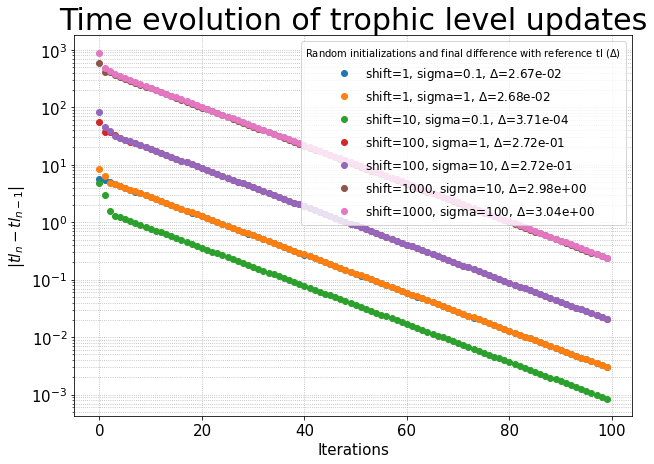

In [89]:
# reference results (for comparison)
ref_trophiclevel, ref_delta_evol = trophic_level(G, loc_shift=10.0, sigma_shift=1.0)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# plot all the desider plots
for mu,s in zip([1,1,10,100,100,1000,1000],[0.1,1,0.1,1,10,10,100]):
    tl, delta_ev = trophic_level(G, loc_shift=mu, sigma_shift=s)
    ax.plot(delta_ev, "o", label=f"shift={mu}, sigma={s}, $\Delta$={la.norm(ref_trophiclevel.values-tl.values):.2e}")


ax.set_title("Time evolution of trophic level updates", fontsize=30)
ax.set_xlabel("Iterations", fontsize=15)
ax.set_ylabel(r"$|{tl}_n - {tl}_{n-1}|$", fontsize=15)
ax.tick_params(axis="both", which="major", labelsize=15)
ax.grid(True, which="both", linestyle=":")
ax.set_yscale("log")
ax.legend(fontsize=12, title="Random initializations and final difference with reference tl ($\Delta$)")

Text(0, 0.5, 'Counts')

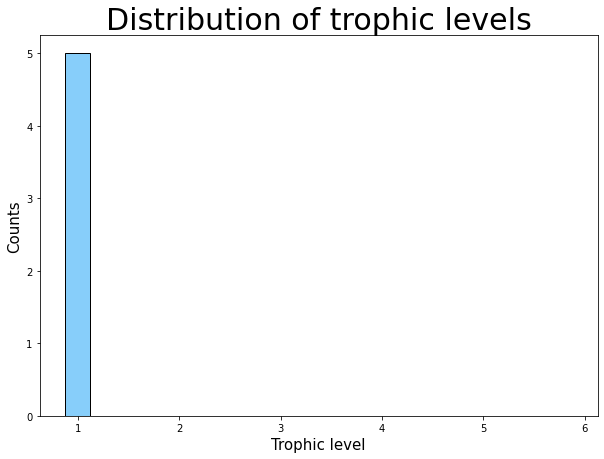

In [90]:
# evaluate and plottrophic level
trophiclevel_df, _ = trophic_level(G, loc_shift=10.0, sigma_shift=1.0)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
ax.hist(trophiclevel_df, color="lightskyblue", edgecolor="black", bins=np.arange(1-0.125, 6.125, step=0.25))

ax.set_title("Distribution of trophic levels", fontsize=30)
ax.set_xlabel("Trophic level", fontsize=15)
ax.set_ylabel("Counts", fontsize=15)

----------------------------------------------------------------------------------------------------------------------